# PyTorch Workflow

Lets explore an example PyTprch end-to-end workflow

Resources:
* Ground Truth Notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book Version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
what_were_covering = {
    1: "Data (prepare and load)",
    2: "Build model",
    3: "Fitting the model to data (training)",
    4: "Evaluating a model and Making Predictions",
    5: "Saving and loading a model",
    6: "Putting it all together"
}

In [2]:
import torch
from torch import nn ##nn contains all of pytorch's building blocks for neural networks.
import matplotlib.pyplot as plt

# Check PyTorch Version
torch.__version__

'2.5.1+cu124'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical data

To showcase this, lets create some **known** data using the linear regression formula

We'll use a linear regression formula to make a straight line with known **parameters**

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

### Splitting data into training and test sets (one of the most important concepts in ML in general)

Lets create a training and test set with our data

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
X_train[:10], y_train[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Visualize Data!

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue color
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot testing data in in green color
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  #Are there predictions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

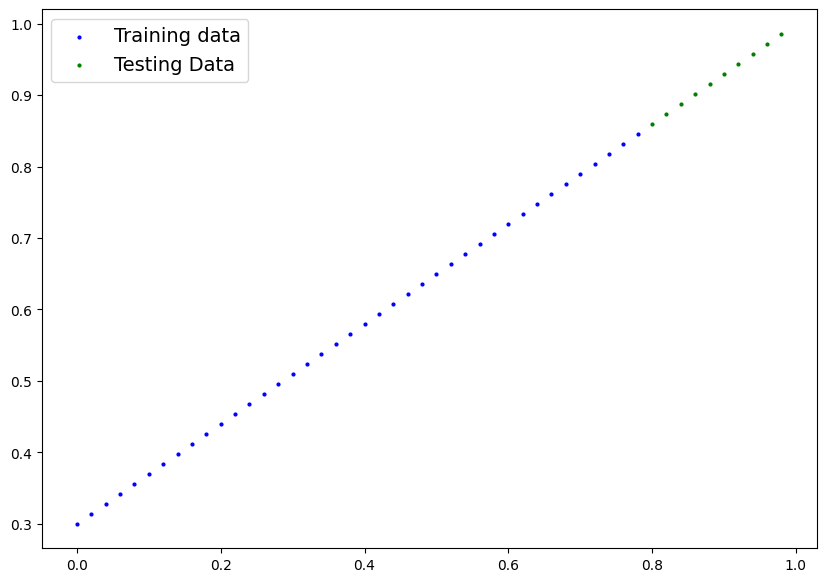

In [8]:
plot_predictions(X_train, y_train, X_test, y_test)

## 2. Build model

Our first PyTorch model!

Python Object Oriented programming: https://realpython.com/python3-object-oriented-programming/

What our model does:
* Start with random values (weight and bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias we used to create the data)

How does it do so?

Trhough two main algorithms:
1. Gradient Descent
2. Backpropogation

In [9]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float
                                            ))
    self.bias = nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # This is the linear regression formula

### PyTorch model building essentials

* `torch.nn` - contains all of the buildings for computational graphs (a neural network can be considered a computations graph)
* `torch.nn.Parameter` - What parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* `torch.optim` - this where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

See more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

#### Checking the contents of our model

 Now we've created a model, let's see what's inside...

 So we can check our model parameters or what's inside our model using `.parameters()`

In [10]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is asubclass of `nn.module`)
model_0 = LinearRegressionModel()

# Check the state of the model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

In [13]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

### Making Predictions using `torch.inference mode()`

To check our model's predictive power, lets see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, its going to run it through the `forward()` method.

See more on inference mode here -- https://x.com/PyTorch/status/1437838231505096708?lang=en&mx=2

In [14]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [15]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can do something similar using `torch.no_grad()` however `torch.inference_mode()` is preferred
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

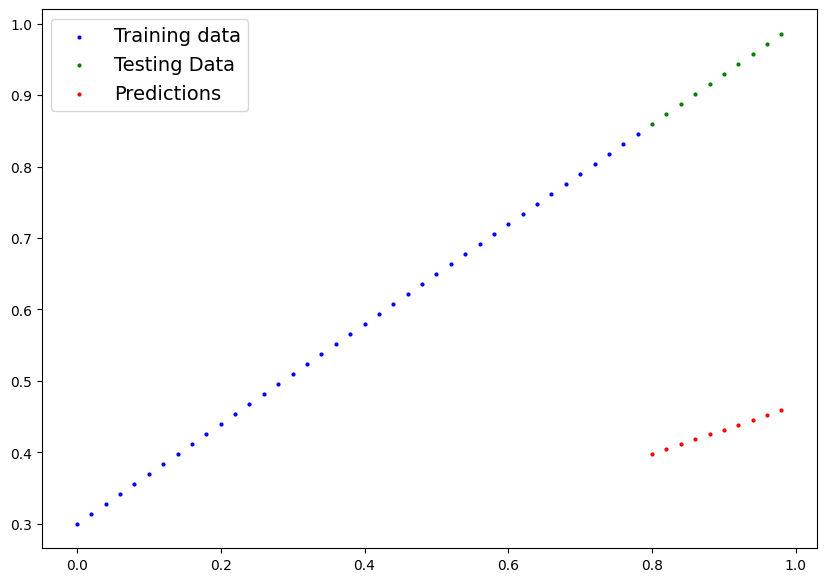

In [16]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The whole idea of traing is for a model to move from some **unknown** parameters (these could be random) to some **known** parameters.

Or in other words from a poor representation to a better representation of the data.

One way to measure how poor or how wrong your model's predictions are to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower the better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias in our case) tom improve the loss function.

And specifically in PyTorch we need:
* A Training loop
* A testing loop

PyTorch Loss Functions: https://pytorch.org/docs/stable/nn.html#loss-functions <br>
PyTorch Optimizers: https://pytorch.org/docs/stable/optim.html  

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# Setup a loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001) # lr is learning rate

In [20]:
loss_fn

L1Loss()

In [21]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Building a training loop and a testing loop in PyTorch

Things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()`) - also called forward propogation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to loss (**backpropogation**)
5. Optimizer step - Use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [22]:
# An epoch is one loop through the data.. (this is a hyperparameter because we've set it ourselves)
epochs = 2000

epoch_count = []
train_loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0.forward(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward / Perform backpropogation
  loss.backward()

  # 5. Optimizer step (perform gradient descent)
  optimizer.step() # By default the optimizer changes will accumulate through the loop soo.. we have to zero them above in step 3

  model_0.eval() # turns off gradient tracking / training settings like dropout etc

  # print(model_0.state_dict())
  with torch.inference_mode():
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)


Epoch: 0 | Train Loss: 0.31288138031959534 | Test Loss: 0.4931890368461609
Epoch: 100 | Train Loss: 0.19767141342163086 | Test Loss: 0.35847947001457214
Epoch: 200 | Train Loss: 0.08973254263401031 | Test Loss: 0.22795839607715607
Epoch: 300 | Train Loss: 0.05357731133699417 | Test Loss: 0.15086300671100616
Epoch: 400 | Train Loss: 0.04549176245927811 | Test Loss: 0.11657620966434479
Epoch: 500 | Train Loss: 0.04160415381193161 | Test Loss: 0.10088418424129486
Epoch: 600 | Train Loss: 0.03811401128768921 | Test Loss: 0.08986451476812363
Epoch: 700 | Train Loss: 0.03466346859931946 | Test Loss: 0.08097299933433533
Epoch: 800 | Train Loss: 0.03122851625084877 | Test Loss: 0.07297395914793015
Epoch: 900 | Train Loss: 0.027794325724244118 | Test Loss: 0.06490625441074371
Epoch: 1000 | Train Loss: 0.02435956709086895 | Test Loss: 0.05690721794962883
Epoch: 1100 | Train Loss: 0.02092517353594303 | Test Loss: 0.0488395169377327
Epoch: 1200 | Train Loss: 0.017490629106760025 | Test Loss: 0.040

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [24]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

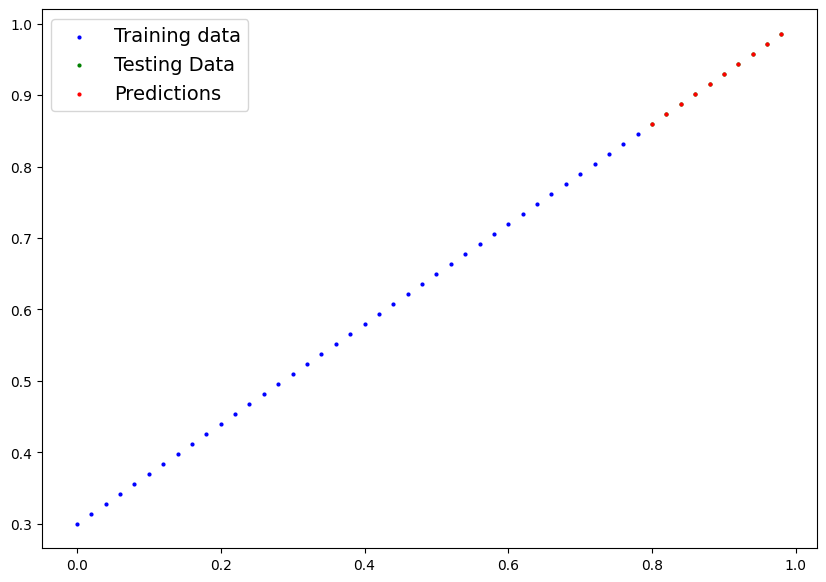

In [25]:
plot_predictions(predictions=y_preds_new)

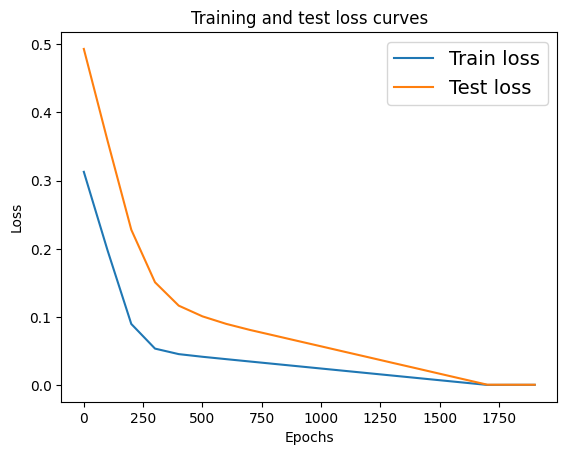

In [26]:
# Plot the loss
with torch.no_grad():
  plt.plot(epoch_count, train_loss_values, label="Train loss")
  plt.plot(epoch_count, test_loss_values, label="Test loss")
  plt.title("Training and test loss curves")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend(prop={"size": 14})

In [27]:
model_0

LinearRegressionModel()

## 4. Saving and Loading a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch:

* `torch.save()` - allows you to save a PyTorch objects in Python's `pkl` format
* `torch.load()` - allows you to load a save PyTorch object
* `torch.nn.Module.load_state_dict()` this allows to load a model's saved state dictionary

PyTorch load and save model code - https://pytorch.org/tutorials/beginner/saving_loading_models.html

### Saving a Model

You can save the entire model along with the class or you can save just the *state_dict()* which contains our trained parameters.

It is recommended by PyTorch to save just the *state_dict()* and instantiate a new instance of the model class

In [29]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_pytorch_worflow_model_0.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_worflow_model_0.pth


In [30]:
!ls -l models/

total 4
-rw-r--r-- 1 root root 1674 Feb 14 21:33 01_pytorch_worflow_model_0.pth


### Loading a model

Since we only saved the *state_dict()* of the model we need to instantiate a new object of our model class. After that, we need to load the *state_dict()* of our saved model

In [31]:
# Loading our PyTorch model

# 1. Create Model Path
MODEL_PATH = Path("models")
MODEL_NAME = "01_pytorch_worflow_model_0.pth"
MODEL_LOAD_PATH = MODEL_PATH / MODEL_NAME

# 2. Create an instance of the model class
model_0_loaded = LinearRegressionModel()

# 3. Load the model
model_0_loaded.load_state_dict(torch.load(MODEL_LOAD_PATH, weights_only=True))

# 4. Set the model to evaluation mode
model_0_loaded.eval()

LinearRegressionModel()

In [33]:
model_0_loaded.state_dict() == model_0.state_dict()

True

In [37]:
with torch.inference_mode():
  y_preds_loaded = model_0_loaded(X_test)
  y_preds = model_0(X_test)

y_preds_loaded, y_preds

(tensor([[0.8593],
         [0.8733],
         [0.8873],
         [0.9013],
         [0.9152],
         [0.9292],
         [0.9432],
         [0.9572],
         [0.9712],
         [0.9852]]),
 tensor([[0.8593],
         [0.8733],
         [0.8873],
         [0.9013],
         [0.9152],
         [0.9292],
         [0.9432],
         [0.9572],
         [0.9712],
         [0.9852]]))

In [38]:
y_preds_loaded == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [36]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

## 5. Putting it all together.

Lets go back athrough the stepas above and see it all in one place

Also we will set up device agnostic mode.
If a GPU is available, the code will use GPU

In [8]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [9]:
# Setup device agnostic mode
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 5.1 Data

Lets create the dataset using the linear regression formula of y = weight * X + bias


In [10]:
# Lets create the dataset using the linear regression formula of y = weight * X + bias

weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1.0
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [11]:
# Split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

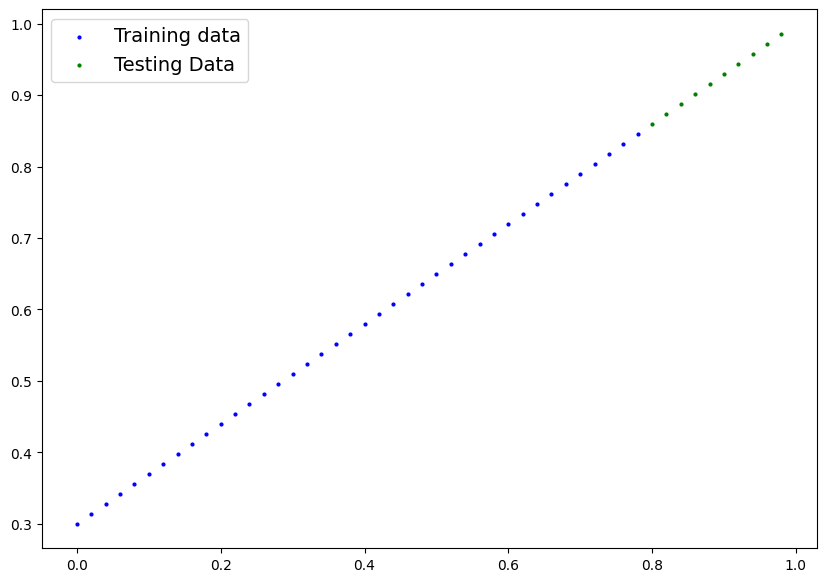

In [12]:
# Visualise the data
plot_predictions(X_train, y_train, X_test, y_test)

### 5.2 Building a Pytorch Model

In [13]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters. /. also called linear transform, probing layer, fully connected layer, dense layer.
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

    # self.weight = torch.randn(1, requires_grad=True, dtype=torch.float)
    # self.bias = torch.randn(1, requires_grad=True, dtype=torch.float)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [14]:
# Set the model to use the target device
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [15]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training the model

For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [16]:
# Setup the loss function
loss_fn = nn.L1Loss()

# Setup Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.007)


In [17]:
# Lets write a training loop
torch.manual_seed(42)

epochs = 5000

# Put data to device for device agnostic code
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Do forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer Zero Grad
  optimizer.zero_grad()

  # 4. Backpropogation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 1000 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 0.5551779866218567 | Test Loss: 0.57801753282547
Epoch: 1000 | Train Loss: 0.0017623536987230182 | Test Loss: 0.0057197511196136475
Epoch: 2000 | Train Loss: 0.0017623536987230182 | Test Loss: 0.0057197511196136475
Epoch: 3000 | Train Loss: 0.0017623536987230182 | Test Loss: 0.0057197511196136475
Epoch: 4000 | Train Loss: 0.0017623536987230182 | Test Loss: 0.0057197511196136475


In [18]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6961]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2998], device='cuda:0'))])

In [20]:
# Turn model into evaluation mode
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

### 6.4 Saving and loading a trained model

In [21]:
from pathlib import Path

# 1. Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a Model Save Path
MODEL_SAVE_PATH = MODEL_PATH / "01_pytorch_workflow_model_1.pth"

# 3. Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(model_1.state_dict(),
           MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_workflow_model_1.pth


In [22]:
model_1_loaded = LinearRegressionModelV2()
model_1_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH,
                                          weights_only=True))

<All keys matched successfully>

In [25]:
model_1_loaded.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [26]:
next(model_1_loaded.parameters()).device

device(type='cuda', index=0)

In [29]:
y_preds_loaded = model_1_loaded(X_test)
y_preds_loaded == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')